# Overview

We're now switching focus away from the Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on wikipedia, since wikipedia is a network of connected pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> **_Video Lecture_**. Today is all about working with NLTK, so not much lecturing - you can get my perspective and a little pep-talk

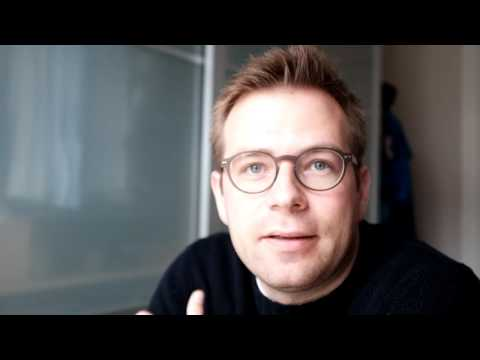

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)

# Installing and the basics

> _Reading_
> The reading for today is Natural Language Processing with Python, first edition (NLPP1e) Chapter 1, Sections 1.1, 1.2, 1.3\. [It's free online](http://www.nltk.org/book_1ed/). 
> 
> * **Important**: Do not use the newest version of this book. Use the first edition. (The newest version is based on on Python 3).
> * **Important**: Seriously, remember that we're using the *first edition*.
> 

> _Exercises_: NLPP1e Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a `notebook`. 
 

### NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks: In the iPython notebook, run the code 

     import nltk
     nltk.download()

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

In [3]:
from collections import Counter
from __future__ import division
import math
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import os
import random

%matplotlib inline
# enable spellcheck: https://github.com/Calysto/notebook-extensions

# use extension configurator tab:
# $ sudo pip install jupyter_nbextensions_configurator
# $ jupyter nbextensions_configurator enable --user

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
nltk.download() # set download dir to subdir ../nltk_data (dir added to .gitignore)
nltk.data.path.append(os.getcwd() + '/../nltk_data') # otherwise LookupError error

# import this after to avoid error
from nltk.book import *

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


> _Exercises_: NLPP1e Chapter 1 (the stuff that might be due in an upcoming assignment).
> 
> The following exercises from Chapter 1 are what might be due for an assignment later one.
>
> * Try out the `concordance` method, using another text and a word of your own choosing.

In [5]:
text7.concordance("money")

Displaying 25 of 60 matches:
00 taxable funds tracked * by IBC 's Money Fund Report eased a fraction of a pe
*-1 Brenda Malizia Negus , editor of Money Fund Report , yields `` may blip up 
stors continue *-1 to pour cash into money funds . Assets of the 400 taxable fu
go after the highest rates . The top money funds are currently yielding well ov
t forces investors to redeploy their money at lower rates . Second , they chann
heless , plenty of U.S. analysts and money managers are aghast at the lofty tra
ll face legal obstacles to * raising money in the U.S. until they settle hundre
 in September . The goverment counts money as it is spent *-53 ; Dodge counts c
*-54 *T*-1 . The government includes money spent * on residential renovation ; 
Japan . Despite the enormous sums of money 0 they 're paid *T*-1 *-2 to stand u
aduate School of Business . Japanese money will help *-1 turn Southeast Asia in
r hand , bring recognition and extra money -- a new computer lab for a school ,
teaching as

> * Also try out the `similar` and `common_context` methods for a few of your own examples.

In [6]:
text7.similar("stock")

shares company the market president economy bond issue million board
government chain exchange program industry information rise law
purchase futures


In [7]:
text7.common_contexts(["rise", "economy"])

the_in the_and the_was the_to


> * Create your own version of a dispersion plot ("your own version" means another text and different word).

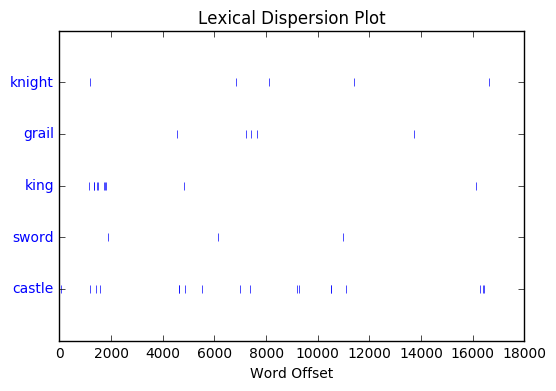

In [8]:
text6.dispersion_plot(["knight", "grail", "king", "sword", "castle"])

> * Explain in your own words what aspect of language _lexical diversity_ describes. 

How often is each word used on average or how frequently it is occurring. It can be calculated by dividing how many words there are in the text through how many unique words there are in the same text. The higher the value the more words are reused and therefore there is less lexical diversity.

In [52]:
def lexical_diversity(text):
    if hasattr(text, 'name'):
        print "stats for: ", text.name
    else:
         print "stats for some text" 
    print "total words:", len(text)
    print "unique words:", len(set(text))
    ld = len(text) / len(set(text))
    print "lexical diversity:", ld, "\n"
    return ld

lexical_diversity(text1)
lexical_diversity(text2)
lexical_diversity(['and', 'and', 'and', 'the'])
lexical_diversity(['and', 'and', 'and', 'and'])

# surpress output
print ""

stats for:  Moby Dick by Herman Melville 1851
total words: 260819
unique words: 19317
lexical diversity: 13.502044831 

stats for:  Sense and Sensibility by Jane Austen 1811
total words: 141576
unique words: 6833
lexical diversity: 20.7194497293 

stats for some text
total words: 4
unique words: 2
lexical diversity: 2.0 

stats for some text
total words: 4
unique words: 1
lexical diversity: 4.0 




> * Create frequency distributions for `text2`, including the cumulative frequency plot for the 75 most common words.

75 most common words (word, count): [(u',', 9397), (u'to', 4063), (u'.', 3975), (u'the', 3861), (u'of', 3565), (u'and', 3350), (u'her', 2436), (u'a', 2043), (u'I', 2004), (u'in', 1904), (u'was', 1846), (u'it', 1568), (u'"', 1506), (u';', 1419), (u'she', 1333), (u'be', 1305), (u'that', 1297), (u'for', 1234), (u'not', 1212), (u'as', 1179), (u'you', 1037), (u'with', 971), (u'had', 969), (u'his', 941), (u'he', 895), (u"'", 883), (u'have', 807), (u'at', 806), (u'by', 737), (u'is', 728), (u'."', 721), (u's', 700), (u'Elinor', 684), (u'on', 676), (u'all', 642), (u'him', 633), (u'so', 617), (u'but', 597), (u'which', 592), (u'could', 568), (u'Marianne', 566), (u'my', 551), (u'Mrs', 530), (u'from', 527), (u'would', 507), (u'very', 492), (u'no', 488), (u'their', 463), (u'them', 462), (u'--', 461), (u'been', 440), (u'were', 437), (u'me', 433), (u'they', 428), (u'more', 406), (u'said', 397), (u',"', 396), (u'any', 389), (u'what', 375), (u'this', 372), (u'-', 366), (u'every', 361), (u'than', 360), (

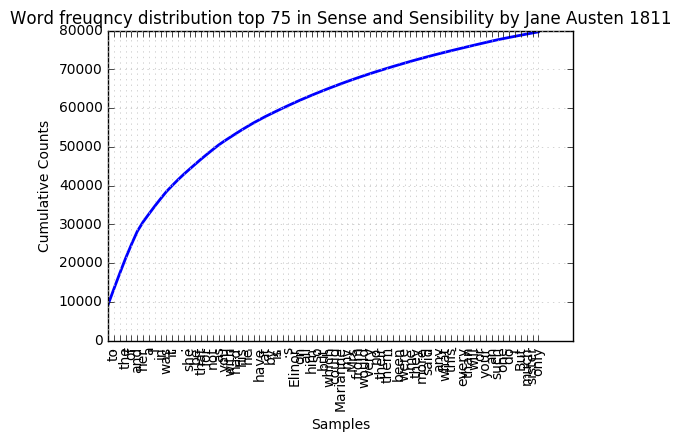

In [10]:
fdist = FreqDist(text2)
print "75 most common words (word, count):", fdist.most_common(75)

# draw
fdist.plot(75, cumulative=True, title='Word freuqncy distribution top 75 in ' + text2.name)

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.

A Bigram is a pair of consecutive written words (can also be chars) like ('dark', 'beer'). Collocations are the most frequent bigrams but also pay attention to the cases that involve rare words. Thus the collocations() function returns often occurring bigrams based on the frequency of individual words.

In [11]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


> * Work through ex 2-12 in NLPP's section 1.8\. 

2) Given an alphabet of 26 letters, there are 26 to the power 10, or $26^{10}$, 10-letter strings we can form. That works out to 141167095653376L (the L at the end just indicates that this is Python's long-number format). How many hundred-letter strings are possible?

In [12]:
hundred_letter_str = long(math.pow(26, 100))

print hundred_letter_str, "hundred-letter strings are possible"
print "\nthat is a number with", len(str(hundred_letter_str)), "digits"

3142930641582939148321506626674543653424561564746718886784252969045266950611409717286297977211428081697598519192769774092119229713411708289024 hundred-letter strings are possible

that is a number with 142 digits


3) The Python multiplication operation can be applied to lists. What happens when you type **['Monty', 'Python'] * 20**, or **3 * sent1**?

In [13]:
sent1 = ['Monty','Python'] * 20

print sent1[0:6], len(sent1)
print len(3 * sent1)

['Monty', 'Python', 'Monty', 'Python', 'Monty', 'Python'] 40
120


Each list item will be duplicated with the given factor. Thus the list **sent1** increases from 2 elements to 40 ($2\times20$) and from 40 to 120 ($40\times3$).

4) Review Section 1.1 on computing with language. How many words are there in **text2**? How many distinct words are there?

In [14]:
print "word count:", len(text2)
print "distinct words:", len(set(text2))

word count: 141576
distinct words: 6833


5) Compare the lexical diversity scores for humor and romance fiction in Table 1-1. Which genre is more lexically diverse?

In [15]:
from nltk.corpus import brown # first million-word electronic corpus of English, created in 1961 at Brown University

lexical_diversity(brown.words(categories='humor'))
lexical_diversity(brown.words(categories='romance'))

stats for some text
total words: 21695
unique words: 5017
lexical diversity: 4.32429738888 

stats for some text
total words: 70022
unique words: 8452
lexical diversity: 8.28466635116 



8.284666351159489

The topic humor has a higher lexical diversity because the score is lower (4.3 vs. 8.3 for romance fiction).

6) Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

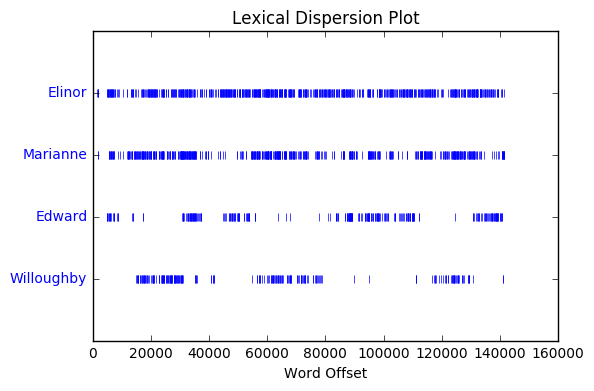

In [16]:
text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Willoughby"])

Elinor seems to be the main protagonist with the most parts along with Marianne. They are both females so probably not a couple although they appear always together so either they are siblings or lesbians (that was probably a taboo when the novel was written in 1811). Edward and Willoughby are usually not appearing together. It seems that Willoughby is appearing most frequently when there is also a lot about Marianne maybe they are a couple. It seems when there is talk about Edward Marianne is not appearing as frequently so he would rather fit to Elinor.

7) Find the collocations in **text5**.

In [17]:
text5.collocations()

wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


8) Consider the following Python expression: **len(set(text4))**. State the purpose of this expression. Describe the two steps involved in performing this computation.

Generating a **set()** of strings will remove all the duplicates in a list (which is all words in text4 [text4.tokens]), all items are hashed for fast accessibility and consequently the order of the list is lost. The **len()** will count the number of elements in any iterable, also sets. See the following outputs.

In [18]:
print text4.tokens[0:5], list(set(text4))[0:5], len(list(set(text4))[0:5]), len(set(text4))

[u'Fellow', u'-', u'Citizens', u'of', u'the'] [u'writings', u'four', u'Does', u'aegis', u'hanging'] 5 9754


9) Review Section 1.2 on lists and strings.

a) Define a string and assign it to a variable, e.g., **my_string = 'My String'** (but put something more interesting in the string). Print the contents of this variable in two ways, first by simply typing the variable name and pressing Enter, then by using the print statement.

In [19]:
my_string = 'but put something more interesting in the string'
my_string

'but put something more interesting in the string'

In [20]:
print my_string

but put something more interesting in the string


b) Try adding the string to itself using **my_string + my_string**, or multiplying it by a number, e.g., **my_string * 3**. Notice that the strings are joined together without any spaces. How could you fix this?

In [21]:
print my_string + my_string
print "\n"
print my_string * 3

but put something more interesting in the stringbut put something more interesting in the string


but put something more interesting in the stringbut put something more interesting in the stringbut put something more interesting in the string


The are various methods to output and concatenate strings, e.g. **format()**. But also **join()** can be used or simply adding the space.

In [22]:
print '{0} {0} {0}'.format(my_string)
print '\n%(s)s %(s)s %(s)s' % {'s': my_string}

a = list()
for i in range(3):
    a.append(my_string)
print "\n", ' '.join(a)

print "\n", my_string + ' ' + my_string

but put something more interesting in the string but put something more interesting in the string but put something more interesting in the string

but put something more interesting in the string but put something more interesting in the string but put something more interesting in the string

but put something more interesting in the string but put something more interesting in the string but put something more interesting in the string

but put something more interesting in the string but put something more interesting in the string


10) Define a variable my_sent to be a list of words, using the syntax **my_sent = ["My", "sent"]** (but with your own words, or a favorite saying).

a) Use **' '.join(my_sent)** to convert this into a string.

In [23]:
my_sent = ["but", "with", "your", "own", "words", ",", "or", "a", "favorite", "saying"]
joined = ' '.join(my_sent)
print joined
print "converted to", type(joined), "from", type(my_sent)

but with your own words , or a favorite saying
converted to <type 'str'> from <type 'list'>


b. Use **split()** to split the string back into the list form you had to start with.

In [24]:
splitted = joined.split()
splitted_with_arg = joined.split(' ')
print splitted
print splitted_with_arg # space is the default to split on
print "converted to", type(splitted), "from", type(joined)

['but', 'with', 'your', 'own', 'words', ',', 'or', 'a', 'favorite', 'saying']
['but', 'with', 'your', 'own', 'words', ',', 'or', 'a', 'favorite', 'saying']
converted to <type 'list'> from <type 'str'>


11) Define several variables containing lists of words, e.g., **phrase1, phrase2**, and so on. Join them together in various combinations (using the plus operator) to form whole sentences. What is the relationship between **len(phrase1 + phrase2**) and **len(phrase1) + len(phrase2)**?

In [25]:
phrase1 = ["Jeg", "snakker", "lidt", "dansk"] # 4
phrase2 = ["Men", "min", "engelsk", "er", "bedre"] # 5

print len(phrase1 + phrase2)
print len(phrase1) + len(phrase2)

9
9


* **len(phrase1 + phrase2)** both lists are merged into one and the length is taken (length of 9 elements)
* **len(phrase1) + len(phrase2)** both lists are taken seperatly and the number of the sum of both list lengths is printed (length of 4 elements plus length of 5 elements)

12) Consider the following two expressions, which have the same value. Which one will typically be more relevant in NLP? Why?

a) **"Monty Python"[6:12]**

In [26]:
print "Monty Python"[6:12]

Python


b) **\["Monty", "Python"\][1]**

In [27]:
print ["Monty", "Python"][1]

Python


Strings are also iterable so version a) prints the characters on the index position 6 to 12. ("Monty " are the characters from 0 to 5 [remember the space is also a char]). Version b) on the contrary has every word as list item and prints the second element with index 1 which makes it more relevant for NLP because only complete words that are listed are interesting.

> * Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8\. 

15) Review the discussion of conditionals in Section 1.4. Find all words in the Chat Corpus (**text5**) starting with the letter b. Show them in alphabetical order.

In [28]:
b_words = [w for w in text5 if w.startswith('b')]
print sorted(set(b_words))[0:15] # sorting standard is alphabetical order

[u'b', u'b-day', u'b/c', u'b4', u'babay', u'babble', u'babblein', u'babe', u'babes', u'babi', u'babies', u'babiess', u'baby', u'babycakeses', u'bachelorette']


17) Use **text9.index()** to find the index of the word _sunset_. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [29]:
print "index of sunset:", text9.index('sunset')

# try and error
print "list from start dot to end dot:", text9[612:644]

# or find the dot before and after the word
sunset_idx = text9.index('sunset')
for idx, w in enumerate(text9[sunset_idx:]):
    if w == '.':
        sent_end_idx = sunset_idx+idx+1 # +1 to make the dot part of the sentence
        break
        
for idx, w in enumerate(reversed(text9[:sunset_idx])):
    if w == '.':
        sent_start_idx = sunset_idx-idx
        break

print ' '.join(text9[sent_start_idx:sent_end_idx])

index of sunset: 629
list from start dot to end dot: [u'.', u'CHAPTER', u'I', u'THE', u'TWO', u'POETS', u'OF', u'SAFFRON', u'PARK', u'THE', u'suburb', u'of', u'Saffron', u'Park', u'lay', u'on', u'the', u'sunset', u'side', u'of', u'London', u',', u'as', u'red', u'and', u'ragged', u'as', u'a', u'cloud', u'of', u'sunset', u'.']
CHAPTER I THE TWO POETS OF SAFFRON PARK THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


19) What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

    >>> sorted(set([w.lower() for w in text1]))
    >>> sorted([w.lower() for w in set(text1)])

In [30]:
try_this = ['H', 'A', 'H', 'a', 'h', 'a', 'a']

version1 = sorted(set([w.lower() for w in text1]))[-10:-1]
print version1, type(version1)
print sorted(set([w.lower() for w in try_this]))

[u'zephyr', u'zeuglodon', u'zig', u'zodiac', u'zogranda', u'zone', u'zoned', u'zones', u'zoology'] <type 'list'>
['a', 'h']


In [31]:
version2 = sorted([w.lower() for w in set(text1)])[-10:-1]
print version2, type(version2)
print sorted([w.lower() for w in set(try_this)])

[u'zodiac', u'zodiac', u'zogranda', u'zone', u'zoned', u'zoned', u'zones', u'zoology', u'zoology'] <type 'list'>
['a', 'a', 'h', 'h']


By simply working from the functions inside the parenthesis to the outside one can conclude:
* The first version lowercases all words in **text1**, then creates a set with the lowercased words and after sorts the set.
* The second version immediately creates a set out of all words and then after first lowercases all elements of the list that is then sorted
* The set in version 2 contains lowercase and uppercase words, the list with all lowercased elements has therefor double elements. This can not be seen when using only showing a few elements of the list.
* There is a smaller example to demonstrate the behavior

22) Find all the four-letter words in the Chat Corpus (**text5**). With the help of a frequency distribution (**FreqDist**), show these words in decreasing order of frequency.

In [32]:
four_letters = [w for w in text5 if len(w) == 4]
print FreqDist(four_letters).most_common()[0:10] # decrease in frequency

[(u'JOIN', 1021), (u'PART', 1016), (u'that', 274), (u'what', 183), (u'here', 181), (u'....', 170), (u'have', 164), (u'like', 156), (u'with', 152), (u'chat', 142)]


23) Review the discussion of looping with conditions in Section 1.4. Use a combination of **for** and **if** statements to loop over the words of the movie script for _Monty Python and the Holy Grail_ (**text6**) and print all the uppercase words, one per line.

In [33]:
cnt = 0
for w in text6:
    if w.isupper():
        print w
        cnt += 1 # uncomment the following lines  if you really want to print all words
        if cnt > 9:
            break

SCENE
KING
ARTHUR
SOLDIER
ARTHUR
I
SOLDIER
ARTHUR
I
I


26) What does the following Python code do? 
   
    sum([len(w) for w in text1]) 
   
Can you use it to work out the average word length of a text?

In [34]:
word_lengths = [len(w) for w in text1]
sum_word_lenghts = sum(word_lengths)

print "sum over all words lengths =", sum_word_lenghts
print "average word length =", sum_word_lenghts/len(word_lengths)

sum over all words lengths = 999044
average word length = 3.83041112802


* The expression iterates over all words in **text1**. Each words length (e.g.: 'hello' has length 5) is saved into a new list. Each number in the new list is summed which results in a single number.
* The average in colloquial language is specified as the sum of a list of numbers divided by the number of numbers in the list ([by wikipedia](https://en.wikipedia.org/wiki/Average)). That's exactly what can be calculated in the cell above.

27) Define a function called **vocab_size(text)** that has a single parameter for the text, and which returns the vocabulary size of the text.

In [35]:
def vocab_size(text):
    # isalpha - tests if all characters are alphabetic
    return len(set([w.lower() for w in text if w.isalpha()]))

In [36]:
print "Vocabulary size of text1 =", vocab_size(text1)

Vocabulary size of text1 = 16948


28) Define a function **percent(word, text)** that calculates how often a given word occurs in a text and expresses the result as a percentage.

In [37]:
def percent(word, text):
    return str((100 * text.count(word)) / len(text)) + '%'

In [38]:
print "What is the percentage of 'the' appearing in text1:", percent('the', text1)

What is the percentage of 'the' appearing in text1: 5.26073637273%


# Working with NLTK and other types of text

So far, we've worked with text from Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP1e is all about getting access to nicely curated texts that you can find built into NLTK. 
> 
> _Reading_: NLPP1e Chapter 2.1 - 2.4\.
> 

> _Exercises_: NLPP1e Chapter 2\.
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP1e, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.

4) Read in the texts of the State of the Union addresses, using the **state_union** corpus reader. Count occurrences of **men**, **women**, and **people** in each document. What has happened to the usage of these words over time?

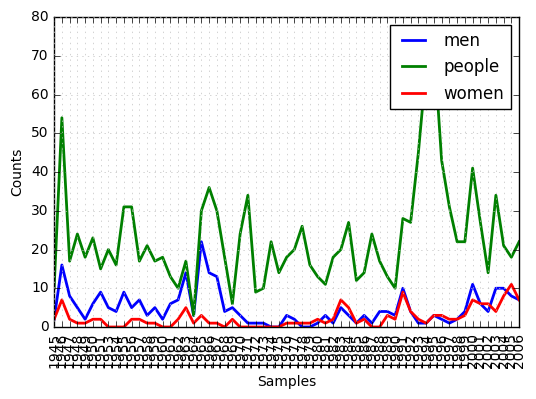

In [39]:
from nltk.corpus import state_union

# counts - word occurences
# samples[:4] - for year
cfd = nltk.ConditionalFreqDist(
    (counts, samples[:4]) # (y, x)
    for samples in state_union.fileids()
    for w in state_union.words(samples)
    for counts in ['men', 'women', 'people']
    if w.lower().startswith(counts))
cfd.plot()

In the earlier years men where mentioned more often than women but starting in the 1970's the counts for men and women in the **state_union** documents evened out. Thee only relation between men and women and the people curve is that in the early years the spikes for counts appear where there is also spikes for men and women. The relational spikes also disappeared in the 1970's.

8) Define a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males versus females (see Figure 2-7).

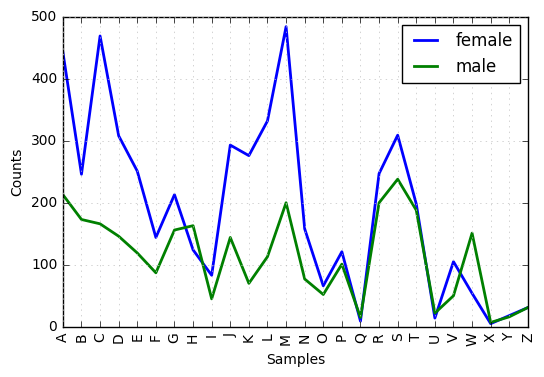

male starting letter distribution: [(u'A', 213), (u'C', 166), (u'B', 173), (u'E', 119), (u'D', 146), (u'G', 156), (u'F', 87), (u'I', 45), (u'H', 163), (u'K', 70), (u'J', 144), (u'M', 200), (u'L', 113), (u'O', 52), (u'N', 77), (u'Q', 15), (u'P', 101), (u'S', 238), (u'R', 200), (u'U', 22), (u'T', 188), (u'W', 151), (u'V', 50), (u'Y', 16), (u'X', 7), (u'Z', 31)]
female starting letter distribution: [(u'A', 443), (u'C', 469), (u'B', 246), (u'E', 251), (u'D', 308), (u'G', 213), (u'F', 144), (u'I', 83), (u'H', 124), (u'K', 276), (u'J', 293), (u'M', 484), (u'L', 332), (u'O', 66), (u'N', 158), (u'Q', 9), (u'P', 121), (u'S', 309), (u'R', 247), (u'U', 14), (u'T', 198), (u'W', 54), (u'V', 105), (u'Y', 18), (u'X', 5), (u'Z', 31)]


In [40]:
from nltk.corpus import names

cfd = nltk.ConditionalFreqDist(
    (fileid.split('.')[0], target[0]) 
    for fileid in names.fileids()
    for target in names.words(fileid))
cfd.plot()

for key, val in cfd.iteritems():
    print key, "starting letter distribution:", val.items()

11) Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [41]:
# Table 2-1 page 43 for modals
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = brown.categories()
modals = ['can', 'could', 'may', 'might', 'must', 'will'] # page 43
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
      adventure    48   154     7    59    27    51 
 belles_lettres   249   216   221   113   171   246 
      editorial   124    57    79    39    55   235 
        fiction    39   168    10    44    55    56 
     government   119    38   179    13   102   244 
        hobbies   276    59   143    22    84   269 
          humor    17    33     8     8     9    13 
        learned   367   159   336   128   203   340 
           lore   170   142   170    50    96   178 
        mystery    45   145    15    57    31    25 
           news    94    87    93    38    53   389 
       religion    84    59    79    12    54    72 
        reviews    45    40    47    26    19    61 
        romance    79   195    11    51    46    49 
science_fiction    16    49     4    12     8    17 


Compared to the example in the book all words where also lowercased, thus some different counts can appear. The genres 'belles_lettres' and 'learned' have a much higher usage of modal verbs in general:
* 'learned' contains: Probability with Statistical Applications by Frederick Mosteller and the content is about the theroy of probability - the mathematics of uncertainty. Uncertainty is always expressed with modal verbs.
* 'belles_lettres' contains: Coping with Runaway Technology by Kenneth Reiner which is a ethical outlook. In philosophy there is probably a high usage of modal verbs.

In [42]:
colloquial_terms = ['ain\'t', 'reckon', 'damn', 'jesus', 'bitch', 'bastard', 'hell']
cfd.tabulate(conditions=genres, samples=colloquial_terms)

                  ain't  reckon    damn   jesus   bitch bastard    hell 
      adventure      21       4       6       0       4       3      18 
 belles_lettres       1       1       0       5       0       0       8 
      editorial       0       0       0      14       0       0       1 
        fiction       6       0       8       9       0       5      24 
     government       0       0       0       0       0       0       0 
        hobbies       0       1       0       0       0       0       0 
          humor       2       0       2       0       0       0       3 
        learned       0       0       0       0       0       0       0 
           lore       1       0       0       0       0       0       6 
        mystery      10       1       9       0       2       2      15 
           news       1       0       0       1       0       0       0 
       religion       0       0       0      33       0       0       3 
        reviews       0       0       0       0    

It can be observed that the adventure, fiction and mystery genre is more frequently using all sorts of colloquial terms. The terms 'jesus' and 'hell' probably have a different meaning in the category religion ;-)

15) Write a program to find all words that occur at least three times in the Brown Corpus.

In [43]:
brown_words = [w.lower() for w in brown.words() if w.isalpha()]
unique_words = set(brown_words)
cnt = Counter(brown_words) # fastest

# build list with counted words occuring three times
occur_3times = [(w, cnt[w]) for w in unique_words if cnt[w] >= 3]

In [44]:
print "brown corpus number of:\n* words occuring at least three times = {0}\n* unique words = {1}\n* alphabetic words = {2}\n* total words = {3}".format(
    len(occur_3times), len(unique_words), len(brown_words), len(brown.words()))
print "\ntop 50 words that appear three times: ", sorted(occur_3times, key=lambda tup: tup[1], reverse=True)[0:50]

brown corpus number of:
* words occuring at least three times = 18954
* unique words = 40234
* alphabetic words = 981716
* total words = 1161192

top 50 words that appear three times:  [(u'the', 69971), (u'of', 36412), (u'and', 28853), (u'to', 26158), (u'a', 23195), (u'in', 21337), (u'that', 10594), (u'is', 10109), (u'was', 9815), (u'he', 9548), (u'for', 9489), (u'it', 8760), (u'with', 7289), (u'as', 7253), (u'his', 6996), (u'on', 6741), (u'be', 6377), (u'at', 5372), (u'by', 5306), (u'i', 5164), (u'this', 5145), (u'had', 5133), (u'not', 4610), (u'are', 4394), (u'but', 4381), (u'from', 4370), (u'or', 4206), (u'have', 3942), (u'an', 3740), (u'they', 3620), (u'which', 3561), (u'one', 3292), (u'you', 3286), (u'were', 3284), (u'her', 3036), (u'all', 3001), (u'she', 2860), (u'there', 2728), (u'would', 2714), (u'their', 2669), (u'we', 2652), (u'him', 2619), (u'been', 2472), (u'has', 2437), (u'when', 2331), (u'who', 2252), (u'will', 2245), (u'more', 2215), (u'if', 2198), (u'no', 2139)]


16) Write a program to generate a table of lexical diversity scores (i.e., token/type ratios), as we saw in Table 1-1. Include the full set of Brown Corpus genres (**nltk.corpus.brown.categories()**). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [45]:
lds = dict()
for cat in brown.categories():
    lds[cat] = lexical_diversity(nltk.Text(brown.words(categories=cat), name=cat))

stats for:  adventure
total words: 69342
unique words: 8874
lexical diversity: 7.81406355646 

stats for:  belles_lettres
total words: 173096
unique words: 18421
lexical diversity: 9.39666684762 

stats for:  editorial
total words: 61604
unique words: 9890
lexical diversity: 6.22891809909 

stats for:  fiction
total words: 68488
unique words: 9302
lexical diversity: 7.36271769512 

stats for:  government
total words: 70117
unique words: 8181
lexical diversity: 8.57071262682 

stats for:  hobbies
total words: 82345
unique words: 11935
lexical diversity: 6.89945538333 

stats for:  humor
total words: 21695
unique words: 5017
lexical diversity: 4.32429738888 

stats for:  learned
total words: 181888
unique words: 16859
lexical diversity: 10.7887775076 

stats for:  lore
total words: 110299
unique words: 14503
lexical diversity: 7.60525408536 

stats for:  mystery
total words: 57169
unique words: 6982
lexical diversity: 8.18805499857 

stats for:  news
total words: 100554
unique words: 143

In [46]:
lowest_div_k = min(lds, key=lds.get)
print "category", lowest_div_k, "has lowest diversity with", lds[lowest_div_k]

category humor has lowest diversity with 4.32429738888


Actually that is not what I would have expected. I thought the diversity might be higher in religion which has a comparable number of unique words (types) 5017 (humor) and 6982 (religion) but religion has almost twice as many total words (tokens) 39399 vs. 21695.

17) Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [47]:
from nltk.corpus import nps_chat

chat = [w for w in nps_chat.words() if w.isalpha() and w.lower() not in stopwords.words('english')]
freq_dist = nltk.FreqDist(chat)

In [48]:
print "nps_chat corpus number of:\n* total words = {0}\n* alphabetic words = {1}\n* frequent words = {2}".format(
    len(nps_chat.words()), len(chat), len(freq_dist))
print "\ntop 50 frequent words", freq_dist.most_common(50)

nps_chat corpus number of:
* total words = 45010
* alphabetic words = 21235
* frequent words = 5035

top 50 frequent words [(u'JOIN', 1021), (u'PART', 1016), (u'lol', 704), (u'hi', 546), (u'ACTION', 346), (u'hey', 264), (u'u', 200), (u'like', 156), (u'chat', 142), (u'good', 130), (u'im', 128), (u'pm', 108), (u'lmao', 107), (u'wanna', 107), (u'Hi', 104), (u'know', 103), (u'get', 102), (u'ya', 100), (u'room', 98), (u'ok', 96), (u'wb', 91), (u'LOL', 87), (u'one', 87), (u'well', 81), (u'oh', 79), (u'hiya', 78), (u'back', 78), (u'yeah', 75), (u'dont', 75), (u'see', 75), (u'go', 73), (u'want', 71), (u'hello', 71), (u'yes', 69), (u'ty', 69), (u'got', 68), (u'everyone', 63), (u'love', 60), (u'guys', 58), (u'talk', 56), (u'right', 54), (u'think', 54), (u'would', 53), (u'nice', 52), (u'thanks', 50), (u'time', 50), (u'anyone', 50), (u'girls', 48), (u'never', 45), (u'thats', 45)]


18) Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [49]:
def frequent_bigram(words, n):
    content = [w for w in words if w.isalpha() and w.lower() not in stopwords.words('english')]
    return nltk.FreqDist(nltk.bigrams(content)).most_common(n)

print frequent_bigram(nps_chat.words(), 50)

[((u'PART', u'JOIN'), 203), ((u'JOIN', u'PART'), 145), ((u'PART', u'PART'), 125), ((u'JOIN', u'JOIN'), 112), ((u'hi', u'hi'), 81), ((u'wanna', u'chat'), 58), ((u'JOIN', u'hi'), 50), ((u'lol', u'PART'), 44), ((u'lol', u'JOIN'), 44), ((u'lol', u'lol'), 42), ((u'lol', u'hi'), 41), ((u'hi', u'JOIN'), 39), ((u'PART', u'hi'), 38), ((u'PART', u'lol'), 36), ((u'JOIN', u'ACTION'), 35), ((u'hi', u'PART'), 32), ((u'JOIN', u'lol'), 29), ((u'PART', u'ACTION'), 27), ((u'PART', u'hey'), 25), ((u'JOIN', u'MODE'), 24), ((u'hi', u'lol'), 24), ((u'pm', u'u'), 23), ((u'ACTION', u'watches'), 21), ((u'JOIN', u'hey'), 20), ((u'hey', u'hi'), 20), ((u'hi', u'hey'), 20), ((u'want', u'chat'), 19), ((u'hey', u'PART'), 17), ((u'guys', u'wanna'), 17), ((u'tryin', u'chat'), 16), ((u'u', u'tryin'), 16), ((u'Hi', u'hi'), 15), ((u'chat', u'pm'), 15), ((u'lol', u'ACTION'), 14), ((u'JOIN', u'wb'), 14), ((u'hi', u'hiya'), 14), ((u'lol', u'hey'), 14), ((u'r', u'u'), 14), ((u'dont', u'know'), 14), ((u'ACTION', u'sits'), 13)

> * Work through exercise 2.8.23 on Zipf's law.

23) **Zipf's Law**: Let $f(w)$ be the frequency of a word $w$ in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's Law states that the frequency of a word type is inversely proportional to its rank (i.e., $f \times r = k$, for some constant $k$). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

a) Write a function to process a large text and plot word frequency against word rank using **pylab.plot**. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale.) What is going on at the extreme ends of the plotted line?

50th and 150th most common word: (u'out', 2097) (u'states', 603)
150th most common word type times three: 1809
First three most frequent elements: (u'the', 69971) (u'of', 36412) (u'to', 26158)
Last three most frequent elements: (u'jawbone', 1) (u'northerly', 1) (u'mosaics', 1)

scale printed: x = log(1), y = log(69971)


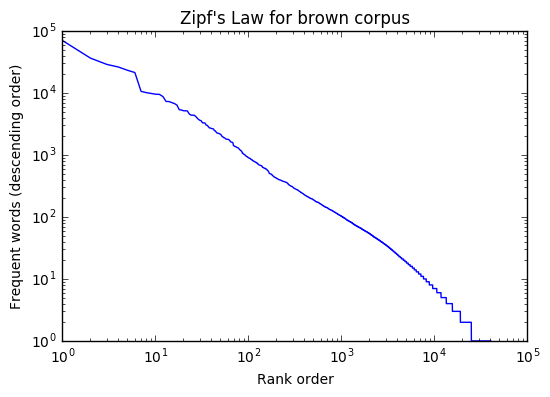

In [50]:
# function for Zipf's Law
def f(w, title):
    # all the words of a text are ranked according to their frequency
    freq_dist = nltk.FreqDist(w)
    rank = freq_dist.most_common(len(w))
    
    # some stats
    print "50th and 150th most common word:", rank[50], rank[150]
    print "150th most common word type times three:", rank[150][1]*3
    print "First three most frequent elements:", rank[0], rank[1], rank[3]
    print "Last three most frequent elements:", rank[-1], rank[-2], rank[-3]

    ### plot
    # x
    rank_ord = xrange(1, len(rank)+1)
    plt.xlabel('Rank order')
    # y
    freq_count = zip(*rank)[1] # only freq count
    plt.ylabel('Frequent words (descending order)')
    # draw
    print "\nscale printed: x = log({0}), y = log({1})".format(rank_ord[0], freq_count[0])
    plt.loglog(rank_ord, freq_count)
    plt.title(title)
    plt.show()

# take already cleaned brown_words
f(brown_words, 'Zipf\'s Law for brown corpus')

Zipf's law can be confirmed for items apart from the low extreme end. The frequency of a word type is inversely proportional to its rank. It is also shown that the rank of the 50th most common word type ($f(w) = 2097$) is approximately three times higher than the rank ($f(w) = 603$) of the 150th most common word type ($3 \times 603 = 1809$). For the upper end Zipf's law is true as well, the most frequent word occurs approximately twice as often as the second most frequent word and approximately three times as often as the third most frequent word.

However at the low extreme end of the plotted line the graph is not inversely proportional. If that would be the case the graph would more flat at the end of the x-axis. The printed out last items show the problem. There is lots of frequent words in the end that nearly have the same rank.

b) Generate random text, e.g., using **random.choice("abcdefg ")**, taking care to include the space character. You will need to **import random** first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, generate the Zipf plot as before, and compare the two plots. What do you make of Zipf’s Law in the light of this?

50th and 150th most common word: ('ab', 218) ('aeg', 33)
150th most common word type times three: 99
First three most frequent elements: ('e', 1986) ('a', 1976) ('d', 1933)
Last three most frequent elements: ('abagegdf', 1) ('fbdbedgabce', 1) ('feabcd', 1)

scale printed: x = log(1), y = log(1986)


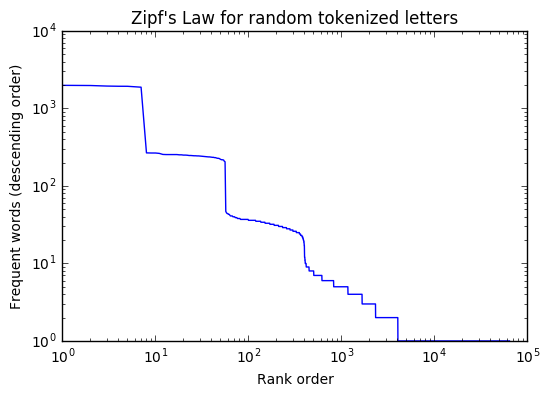

In [51]:
long_str = ''
for i in xrange(len(brown_words)): # same length as brown corpus
    rand_char = random.choice('abcdefg ')
    long_str += rand_char
tokens = nltk.word_tokenize(long_str)

f(tokens, 'Zipf\'s Law for random tokenized letters')

The plot with randomized letter combinations shows no correlation to Zipf's law. The short elements on the top are evenly ranked and the longer strings at the bottom that are less frequently are making up more percent of all tokenized letters than before.

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one?

The property they both share is the power law according to both extreme ends. In Barabasi-Albert networks there is preferential attachment. When a new edge is created, it is more likely to connect to a vertex that already has a large number of edges. It is sort of a "rich gets richer" effect that is the same in Zipf's law with a highly ranked word on top.

To recall Barabasi-Albert measure the degree (number of connections) of each node and compute $P(k)$, the probability that a vertex has degree $k$; then they plot $P(k)$ versus $k$ on a log-log scale. The tail of the plot fits a straight line, so they conclude that it obeys a power law; that is, as $k$ gets large, $P(k)$ is asymptotic to $k^{-\gamma}$, where $\gamma$ is a parameter that determines the rate of decay. Also at Zipf's law the tail more and more fits a straight line because there are many elements ranked at the bottom. [source](http://greenteapress.com/complexity/html/thinkcomplexity006.html)

Take a look at [this article](http://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.

Apart from the internet as an example there are:
* Gamma correction - A gamma characteristic is a power-law relationship that approximates the relationship between the encoded luma in a television system and the actual desired image luminance. [source](https://en.wikipedia.org/wiki/Gamma_correction)
* SOA for power semiconductor devices (e.g.: MOSFET) - The safe operating area (SOA) is defined as the voltage and current conditions over which the device can be expected to operate without self-damage. [source](https://en.wikipedia.org/wiki/Safe_operating_area)
* The 1% rule in internet culture -  States that only 1% of the users of a website actively create new content, while the other 99% of the participants only lurk. [source](https://en.wikipedia.org/wiki/1%25_rule_(Internet_culture))